# Importing modules

In [19]:
from deblur import blind_deconv
from latent_step import synth_kernel,im_normalize
from utils import whiten_background
from numpy import load,loadtxt,savetxt
from skimage import io
import matplotlib.pyplot as plt
from boundaries import wrap_boundary_liu
%matplotlib inline

# Blind deconvolution of toy text example

In [2]:
image = io.imread('test.tif')/255.0;
inference, k, = blind_deconv(image[10:-15, 10:-5],
                             synth_kernel(25),
                             50,
                             4e-3,
                             1,
                             2560,
                             2**3,
                             1e5,
                             4e-3,
                             0.003,
                             1e-3);
inference = whiten_background(inference);

  0%|          | 0/50 [00:00<?, ?it/s]/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
  2%|▏         | 1/50 [00:08<07:18,  8.95s/it]/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
  4%|▍         | 2/50 [00:15<06:32,  8.18s/it]/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/si

 36%|███▌      | 18/50 [02:02<03:20,  6.27s/it]/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
 38%|███▊      | 19/50 [02:11<03:34,  6.92s/it]/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
 40%|████      | 20/50 [02:20<03:46,  7.54s/it]/Volumes/Home/ys_koshelev/anaconda3/lib/p

 72%|███████▏  | 36/50 [04:18<01:20,  5.75s/it]/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
 74%|███████▍  | 37/50 [04:24<01:11,  5.53s/it]/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Volumes/Home/ys_koshelev/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
 76%|███████▌  | 38/50 [04:29<01:06,  5.51s/it]/Volumes/Home/ys_koshelev/anaconda3/lib/p

# Deblurred image results

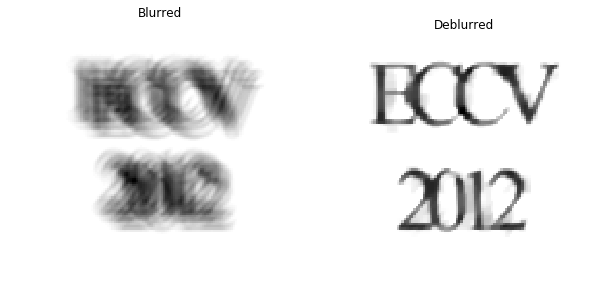

In [14]:
fig, ax = plt.subplots(1,2, figsize=(10,20));
ax[0].imshow(image, cmap='gray');
ax[0].axis('off');
ax[0].set_title('Blurred');
ax[1].imshow(inference, cmap='gray');
ax[1].set_title('Deblurred');
ax[1].axis('off');

# Estimated kernel results

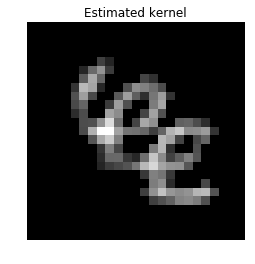

In [17]:
plt.imshow(k, cmap='gray');
plt.axis('off');
plt.title('Estimated kernel');

# Warping boubndaries (transparent baundary conditions)

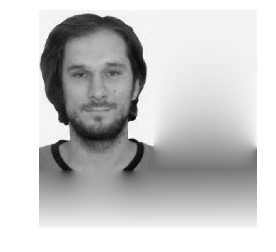

In [38]:
image = io.imread('Oseledets.jpg');
plt.imshow(wrap_boundary_liu(image,(1000,1000)), cmap='gray')
plt.axis('off');